In [2]:
from __future__ import print_function, division
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

%matplotlib inline

# Working with Time Series Data in Pandas

In this notebook, we'll show some basic time series manipulations. Pandas handles time series out of the box by using time-related objects, such as datetime objects, datetime index, and timedelta or periods objects.

You can do all sorts of cool things like time slicing, time frequency conversion, and resampling time series. 
Let's jump in!

In [3]:
# Let's say we have some dates, how do we represent them in pandas? 
dates = ['2015-05-20','2016-01-31','2017-6-12', '2017-6-21']

In [4]:
# With strings is fine, however, datetime objects are much more powerful
dates

['2015-05-20', '2016-01-31', '2017-6-12', '2017-6-21']

In [9]:
##### we can easily converts list of dates to datetime objects
pd.to_datetime(dates, format = '%Y-%m-%d')

# equivalently, you can also do this
# pd.DatetimeIndex(dates)

DatetimeIndex(['2015-05-20', '2016-01-31', '2017-06-12', '2017-06-21'], dtype='datetime64[ns]', freq=None)

This is great! But time-consuming. We cannot always enter lists of dates one by one.   
Luckily pandas provides an easy way to do it.

In [10]:
# It's super easy to create a date range that represent a period of time with some resolution
dates1 = pd.date_range('2017-6-17', periods=20) # the default frequency is a calendar day

In [11]:
dates1

DatetimeIndex(['2017-06-17', '2017-06-18', '2017-06-19', '2017-06-20',
               '2017-06-21', '2017-06-22', '2017-06-23', '2017-06-24',
               '2017-06-25', '2017-06-26', '2017-06-27', '2017-06-28',
               '2017-06-29', '2017-06-30', '2017-07-01', '2017-07-02',
               '2017-07-03', '2017-07-04', '2017-07-05', '2017-07-06'],
              dtype='datetime64[ns]', freq='D')

In [14]:
dates2 = pd.date_range(start = '2014-1-1', end = '2017-1-1', freq = 'W-MON')

In [15]:
## note that both the start and end date are included in the object
dates2[0],dates2[-1]

(Timestamp('2014-01-06 00:00:00', freq='W-MON'),
 Timestamp('2016-12-26 00:00:00', freq='W-MON'))

In [18]:
dates2.shape

(156,)

In [19]:
# Let's generate some fake data to represent daily commits Metis students make on the class repo
commits = np.random.randint(0, 8, len(dates2))

In [20]:
df = pd.DataFrame(commits,columns=['commits'])

In [21]:
# Set the index to be our generated dates
df.index = dates2

In [22]:
df.head()

,commits
2014-01-06,6
2014-01-13,7
2014-01-20,3
2014-01-27,7
2014-02-03,3


In [27]:
import random
random.seed(10)

## Slicing Date Ranges
Pandas has some smart features that allow you to slice a particular year, month or other date range with ease.

In [28]:
# Datetime Selection
# Let's see all the commits that happened in 2015
df['2015']

,commits
2015-01-05,0
2015-01-12,1
2015-01-19,6
2015-01-26,7
2015-02-02,0
2015-02-09,0
2015-02-16,2
2015-02-23,5
2015-03-02,4
2015-03-09,0


In [29]:
# That's cool! How about all the commits in May 2015 alone
df['2015-5']

,commits
2015-05-04,7
2015-05-11,6
2015-05-18,5
2015-05-25,0


In [30]:
# Pandas can be rather smart about formats, too
df['05/2014']

,commits
2014-05-05,2
2014-05-12,7
2014-05-19,1
2014-05-26,7


In [31]:
# Select all dates after 2015-2-13
df[pd.datetime(2015, 2, 13):]

,commits
2015-02-16,2
2015-02-23,5
2015-03-02,4
2015-03-09,0
2015-03-16,0
2015-03-23,3
2015-03-30,2
2015-04-06,7
2015-04-13,2
2015-04-20,3


In [32]:
# Everything from 2016 Jan to June (inclusive)
df['1/1/2016':'6/30/2016']

,commits
2016-01-04,7
2016-01-11,0
2016-01-18,1
2016-01-25,5
2016-02-01,7
2016-02-08,2
2016-02-15,1
2016-02-22,7
2016-02-29,6
2016-03-07,2


In [40]:
df['06/2016']

,commits
2016-06-06,6
2016-06-13,0
2016-06-20,3
2016-06-27,5


## You can offset datetimes with addition / subtraction
Use DateOffset objects from `pd.tseries.DateOffset`

In [44]:
df[:5].index

DatetimeIndex(['2014-01-06', '2014-01-13', '2014-01-20', '2014-01-27',
               '2014-02-03'],
              dtype='datetime64[ns]', freq='W-MON')

In [47]:
# Fast forward 4 months and 5 days
df[:5].index - pd.tseries.offsets.DateOffset(months=4, days=5)

DatetimeIndex(['2013-09-01', '2013-09-08', '2013-09-15', '2013-09-22',
               '2013-09-28'],
              dtype='datetime64[ns]', freq=None)

In [48]:
df[:5].index - pd.tseries.offsets.Timedelta(minutes=4, seconds=5)

DatetimeIndex(['2014-01-05 23:55:55', '2014-01-12 23:55:55',
               '2014-01-19 23:55:55', '2014-01-26 23:55:55',
               '2014-02-02 23:55:55'],
              dtype='datetime64[ns]', freq='W-SUN')

## Difference in datetime objects gives us a Timedelta object

In [49]:
tdiff = df[20:25].index - df[0:5].index
tdiff

TimedeltaIndex(['140 days', '140 days', '140 days', '140 days', '140 days'], dtype='timedelta64[ns]', freq=None)

In [50]:
tdiff + pd.tseries.offsets.Minute(15)

TimedeltaIndex(['140 days 00:15:00', '140 days 00:15:00', '140 days 00:15:00',
                '140 days 00:15:00', '140 days 00:15:00'],
               dtype='timedelta64[ns]', freq=None)

## Datetime components (year, month, weekday, weekofyear, dayofweek, etc)
It's easy to get datetime components, pandas has it all built-in!

In [51]:
#Let's say we want to add another column to our df that registers the day of week of our commits
df['day_of_week'] = df.index.dayofweek
df

,commits,day_of_week
2014-01-06,6,0
2014-01-13,7,0
2014-01-20,3,0
2014-01-27,7,0
2014-02-03,3,0
2014-02-10,4,0
2014-02-17,1,0
2014-02-24,2,0
2014-03-03,4,0
2014-03-10,3,0


In [52]:
# Do people tend to work more on weekdays compared to weekends? Remember that this is fake data.
df.groupby('day_of_week').commits.sum()


day_of_week
0    578
Name: commits, dtype: int64

In [53]:
df['delta_commits'] = df.commits.diff()

In [54]:
df.head()

,commits,day_of_week,delta_commits
2014-01-06,6,0,NaN
2014-01-13,7,0,1.0
2014-01-20,3,0,-4.0
2014-01-27,7,0,4.0
2014-02-03,3,0,-4.0


# Weather Data:
Enough with the fake data! Let's move on to do an exercise on real weather data.

In [55]:
# Load in the weather data from 'weather.csv' and name it weather
weather = pd.read_csv('./add_resources/weather.csv')

In [56]:
# what's the size of our data?
weather.shape

(8784, 8)

In [57]:
# Examine the columns 
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
Date/Time             8784 non-null object
Temp (C)              8784 non-null float64
Dew Point Temp (C)    8784 non-null float64
Rel Hum (%)           8784 non-null int64
Wind Spd (km/h)       8784 non-null int64
Visibility (km)       8784 non-null float64
Stn Press (kPa)       8784 non-null float64
Weather               8784 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [58]:
# Examine a few rows of our data
weather.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


**Questions:**
 *  What is the type of the data in the 'Date/Time' column?
 *  Convert it to a datetime object and set it to the index of our dateframe? 
 *  Plot the average temperature by day.

In [59]:
weather.index[:5]

RangeIndex(start=0, stop=5, step=1)

In [60]:
#### Your code goes here:
weather['Date/Time'] = pd.to_datetime(weather['Date/Time'])

In [63]:
weather.head()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [ ]:
weather.set_index('Date/Time', inplace = True)

## Map, apply, and the lambda function

**map( )**   
Run a function on every element in a Series. For instance, let's try converting temperature to Fahrenheit and adding that column: 

In [65]:
# Function that converts Celsius to Fahrenheit
def celsius_to_fahrenheit(temp):
    return (9.0*temp/5.0) + 32

# Use it to make the conversion and add a new column for it
weather['Temp (F)'] = weather['Temp (C)'].map(celsius_to_fahrenheit)
# weather['Temp (F)'] = weather['Temp (C)'].apply(celsius_to_fahrenheit)
weather.head()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Temp (F)
Date/Time,,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,28.76
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,28.76
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",28.76
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",29.30
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,29.30


**Lambda Functions **   
Often we won't want to explicitly write out the function definition for something like this because we'll just use it once and never again. This is where "throwaway" or "temp" functions come in with the lambda operator. Here's how you would do the same task with a lambda:

In [67]:
weather['Temp (F)'] = weather['Temp (C)'].map(lambda x: 9.0*x/5.0 + 32)
weather['ishot'] = weather['Temp (C)'].map(lambda temp:(temp>30 and 'Hot') or 'Cold')
weather.head()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Temp (F),ishot
Date/Time,,,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,28.76,Cold
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,28.76,Cold
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",28.76,Cold
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",29.30,Cold
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,29.30,Cold


** apply(  )**  
This is for functions that operate on entire arrays (Series) within a Dataframe. Examples would include your usual aggregation functions like sum(), mean(), etc. Here for example is how we might use it to find the range for each numeric column:

In [68]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2012-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 9 columns):
Temp (C)              8784 non-null float64
Dew Point Temp (C)    8784 non-null float64
Rel Hum (%)           8784 non-null int64
Wind Spd (km/h)       8784 non-null int64
Visibility (km)       8784 non-null float64
Stn Press (kPa)       8784 non-null float64
Weather               8784 non-null object
Temp (F)              8784 non-null float64
ishot                 8784 non-null object
dtypes: float64(5), int64(2), object(2)
memory usage: 686.2+ KB


In [69]:
# Select only temperature columns and find their range
weather_temps = weather[['Temp (C)', 'Temp (F)']]
weather_temps.apply(lambda x: x.max() - x.min())

Temp (C)     56.30
Temp (F)    101.34
dtype: float64

In [70]:
# Can also use apply on rows
def add_temps(row):
    return row['Temp (C)']+row['Temp (F)']

weather_temps['temp_sum'] = weather_temps.apply(add_temps, axis=1) # NEED AXIS = 1 for rows, AXIS = 0 for columns
weather_temps.sample(10)

/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Temp (C),Temp (F),temp_sum
Date/Time,,,
2012-09-30 10:00:00,11.9,53.42,65.32
2012-04-11 18:00:00,8.4,47.12,55.52
2012-05-07 02:00:00,5.2,41.36,46.56
2012-05-29 14:00:00,25.6,78.08,103.68
2012-06-02 18:00:00,13.1,55.58,68.68
2012-06-19 04:00:00,18.1,64.58,82.68
2012-02-13 13:00:00,-4.9,23.18,18.28
2012-05-22 02:00:00,18.5,65.30,83.80
2012-07-25 04:00:00,14.5,58.10,72.60


In [71]:
weather.head()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Temp (F),ishot
Date/Time,,,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,28.76,Cold
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,28.76,Cold
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",28.76,Cold
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",29.30,Cold
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,29.30,Cold


## String operations  

**map** , ** apply ** and **applymap** (you can read on them more [here](https://stackoverflow.com/questions/19798153/difference-between-map-applymap-and-apply-methods-in-pandas)) are general and allow you to write just about any function to apply to elements in dataframes. However, pandas has a bunch of its own built-in functions for these things, especially when working with strings.
The Weather column is our only string here, so let's use it to look at some string operators. First let's check out the unique values in there:

In [73]:
weather.Weather.unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog', 'Thunderstorms,Moderate Rain Showers,Fog',
       'Rain Showers,Fog', 'Rain Showers,Snow Showers', 'Snow Pellets',
       'Rain,Snow,Fog', 'Moderate Rain,Fog',
       'Freezing Rain,Ice Pellets,Fog', 'Drizzle,Ice Pellets,Fog',
       'Drizzle,Snow', 'Rain,Ice Pellets', 'Drizzle,Snow,Fog',
       

** replace( )**  
Just to demonstrate, let's replace all of the occurrences of "Fog" with "-Fog-":

In [74]:
fog = weather.Weather.str.replace('Fog', '-Fog-')
fog.unique()

array(['-Fog-', 'Freezing Drizzle,-Fog-', 'Mostly Cloudy', 'Cloudy',
       'Rain', 'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow',
       'Clear', 'Freezing Rain,-Fog-', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing -Fog-',
       'Haze', 'Rain,-Fog-', 'Drizzle,-Fog-', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,-Fog-', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,-Fog-', 'Thunderstorms',
       'Thunderstorms,Rain,-Fog-',
       'Thunderstorms,Moderate Rain Showers,-Fog-', 'Rain Showers,-Fog-',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,-Fog-',
       'Moderate Rain,-Fog-', 'Freezing Rain,Ice Pellets,-Fog-',
       'Drizzle,Ice Pellets,-Fog-', 'Drizzle,Snow', 'Rain,Ice Pellets

This is great! But right now we care more about Snowy days. You'll see that the 'Weather' column has a text description of the weather that was going on each hour. And sometimes there are multiple conditions. We'll assume it's snowing if the text description contains "Snow".

** contains( ) **  
Let's use this method to check if the Weather contains "Snow" and if it does store that in is_snowing:


In [75]:
# Your answers here

In [76]:
is_snowing = weather.Weather.str.contains('Snow')
is_snowing[:5]

Date/Time
2012-01-01 00:00:00    False
2012-01-01 01:00:00    False
2012-01-01 02:00:00    False
2012-01-01 03:00:00    False
2012-01-01 04:00:00    False
Name: Weather, dtype: bool

In [77]:
weather['is_snowing'] = is_snowing
weather.head(20)

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Temp (F),ishot,is_snowing
Date/Time,,,,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,28.76,Cold,False
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,28.76,Cold,False
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",28.76,Cold,False
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",29.30,Cold,False
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,29.30,Cold,False
2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog,29.48,Cold,False
2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog,29.30,Cold,False
2012-01-01 07:00:00,-1.4,-3.6,85,7,8.0,101.26,Fog,29.48,Cold,False
2012-01-01 08:00:00,-1.4,-3.6,85,9,8.0,101.23,Fog,29.48,Cold,False


## Resampling
Pandas provide easy way to resample data to different time frequency. 

Every datetime index has an inherent frequency (sometime the frequency is `None` if it wasn't specified).   

** The resample() method is so valuable in that it allows us to either upsample or downsample to change the frequency of the observations. **  

Upsampling involved getting more frequent observations--obviously this is limited by the total number that you have--but you can also potentially interpolate values for these new observations and pandas has methods for doing this.   

In downsampling, you're simple reducing the observations down to the appropriate frequency.
Let's use resampling along with our is_snowing variable to determine the snowiest month (as opposed to the current data by day)! When downsampling like this, you can specify parameters as to how to aggregate the observations being dropped. Here we'll use the mean:

In [78]:
# Reset the index just in-case we mucked it up above, and actually get the snowing part ready for future cells
# weather['Date/Time'] = pd.to_datetime(weather['Date/Time'])
# weather.set_index('Date/Time', drop=True, inplace=True)
is_snowing = weather.Weather.str.contains('Snow')
weather['is_snowing'] = is_snowing

In [84]:
# What's happening here? Group by month, and this command is special for time data
weather['is_snowing'].astype(float).resample('BM').apply(np.mean)

Date/Time
2012-01-31    0.240591
2012-02-29    0.162356
2012-03-30    0.090278
2012-04-30    0.014785
2012-05-31    0.000000
2012-06-29    0.000000
2012-07-31    0.000000
2012-08-31    0.000000
2012-09-28    0.000000
2012-10-31    0.000000
2012-11-30    0.038889
2012-12-31    0.251344
Freq: BM, Name: is_snowing, dtype: float64

(0, 1.0)

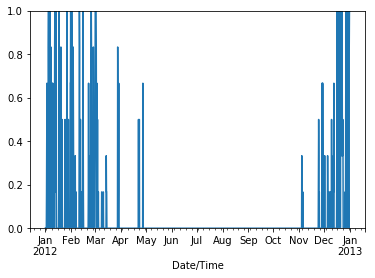

In [89]:
# Let's plot the snow by month
weather['is_snowing'].astype(float).resample('6H').apply(np.mean).plot.line(ylim=[-0.1,.5])
plt.ylim([0, 1.0])

In [90]:
# Let's plot the snow by month
tmp_series = weather['is_snowing'].astype(float).resample('6H')
tmp_series.interpolate('linear')

Date/Time
2012-01-01 00:00:00    0.0
2012-01-01 06:00:00    0.0
2012-01-01 12:00:00    0.0
2012-01-01 18:00:00    0.0
2012-01-02 00:00:00    0.0
2012-01-02 06:00:00    0.0
2012-01-02 12:00:00    0.0
2012-01-02 18:00:00    0.0
2012-01-03 00:00:00    1.0
2012-01-03 06:00:00    1.0
2012-01-03 12:00:00    0.0
2012-01-03 18:00:00    0.0
2012-01-04 00:00:00    0.0
2012-01-04 06:00:00    0.0
2012-01-04 12:00:00    1.0
2012-01-04 18:00:00    1.0
2012-01-05 00:00:00    1.0
2012-01-05 06:00:00    1.0
2012-01-05 12:00:00    0.0
2012-01-05 18:00:00    0.0
2012-01-06 00:00:00    0.0
2012-01-06 06:00:00    1.0
2012-01-06 12:00:00    1.0
2012-01-06 18:00:00    0.0
2012-01-07 00:00:00    0.0
2012-01-07 06:00:00    0.0
2012-01-07 12:00:00    0.0
2012-01-07 18:00:00    1.0
2012-01-08 00:00:00    0.0
2012-01-08 06:00:00    0.0
                      ... 
2012-12-24 12:00:00    0.0
2012-12-24 18:00:00    0.0
2012-12-25 00:00:00    0.0
2012-12-25 06:00:00    0.0
2012-12-25 12:00:00    0.0
2012-12-25 18:00:0

In [ ]:
# Exercise: Can you get the median temperature of each week of the year by using resampling?


## Shifting / Lagging

In [92]:
## Shifting / Lagging, make sure the data are indexed by datetime
weather['Temp_2_periods_ago'] = weather['Temp (F)'].shift(periods=2)
weather['Temp_next_period'] = weather['Temp (F)'].shift(periods=-1)
weather

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Temp (F),ishot,is_snowing,Temp_2_periods_ago,Temp_next_period
Date/Time,,,,,,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,28.76,Cold,False,NaN,28.76
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,28.76,Cold,False,NaN,28.76
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",28.76,Cold,False,28.76,29.30
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",29.30,Cold,False,28.76,29.30
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,29.30,Cold,False,28.76,29.48
2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog,29.48,Cold,False,29.30,29.30
2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog,29.30,Cold,False,29.30,29.48
2012-01-01 07:00:00,-1.4,-3.6,85,7,8.0,101.26,Fog,29.48,Cold,False,29.48,29.48
2012-01-01 08:00:00,-1.4,-3.6,85,9,8.0,101.23,Fog,29.48,Cold,False,29.30,29.66


In [93]:
# You can also specify the frequency of the shift
weather['Temp_1_day_ago'] = weather['Temp (F)'].shift(1, freq='D')

In [94]:
weather

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Temp (F),ishot,is_snowing,Temp_2_periods_ago,Temp_next_period,Temp_1_day_ago
Date/Time,,,,,,,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,28.76,Cold,False,NaN,28.76,NaN
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,28.76,Cold,False,NaN,28.76,NaN
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",28.76,Cold,False,28.76,29.30,NaN
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",29.30,Cold,False,28.76,29.30,NaN
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,29.30,Cold,False,28.76,29.48,NaN
2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog,29.48,Cold,False,29.30,29.30,NaN
2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog,29.30,Cold,False,29.30,29.48,NaN
2012-01-01 07:00:00,-1.4,-3.6,85,7,8.0,101.26,Fog,29.48,Cold,False,29.48,29.48,NaN
2012-01-01 08:00:00,-1.4,-3.6,85,9,8.0,101.23,Fog,29.48,Cold,False,29.30,29.66,NaN


## Frequency Conversion
You can use the **asfreq( )** function to change frequencies easily. It just regenerate a datetimeindex and re-index the dataframe. So there is no aggregation happening.

In [95]:
## Looks like it takes the first reading of the last day of each month
weather.asfreq('M')

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Temp (F),ishot,is_snowing,Temp_2_periods_ago,Temp_next_period,Temp_1_day_ago
Date/Time,,,,,,,,,,,,,
2012-01-31,-7.0,-13.1,62,7,25.0,101.92,Mostly Cloudy,19.40,Cold,False,17.96,19.22,25.34
2012-02-29,-8.2,-13.8,64,9,25.0,102.51,Clear,17.24,Cold,False,17.06,14.90,19.94
2012-03-31,1.5,-8.6,47,13,25.0,101.33,Mostly Cloudy,34.70,Cold,False,32.72,34.34,32.18
2012-04-30,3.3,-10.3,36,9,25.0,102.06,Clear,37.94,Cold,False,41.18,35.96,33.44
2012-05-31,16.7,10.5,67,6,25.0,100.28,Mostly Cloudy,62.06,Cold,False,63.32,61.34,69.08
2012-06-30,23.1,11.9,49,20,25.0,99.63,Clear,73.58,Cold,False,78.26,72.68,71.96
2012-07-31,22.2,19.0,82,6,25.0,101.03,Mainly Clear,71.96,Cold,False,74.84,70.34,71.42
2012-08-31,23.4,14.5,57,33,25.0,100.55,Clear,74.12,Cold,False,75.56,74.30,63.50
2012-09-30,10.8,9.4,91,13,8.0,101.03,"Drizzle,Fog",51.44,Cold,False,51.08,51.26,55.40


In [96]:
weather['2012-01-31']

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Temp (F),ishot,is_snowing,Temp_2_periods_ago,Temp_next_period,Temp_1_day_ago
Date/Time,,,,,,,,,,,,,
2012-01-31 00:00:00,-7.0,-13.1,62,7,25.0,101.92,Mostly Cloudy,19.40,Cold,False,17.96,19.22,25.34
2012-01-31 01:00:00,-7.1,-13.2,62,6,25.0,101.88,Cloudy,19.22,Cold,False,16.52,20.30,24.08
2012-01-31 02:00:00,-6.5,-13.1,59,11,25.0,101.81,Snow,20.30,Cold,True,19.40,19.76,22.82
2012-01-31 03:00:00,-6.8,-12.4,64,15,19.3,101.76,Snow,19.76,Cold,True,19.22,19.22,21.02
2012-01-31 04:00:00,-7.1,-12.4,66,17,8.0,101.71,Snow,19.22,Cold,True,20.30,19.22,18.14
2012-01-31 05:00:00,-7.1,-12.2,67,17,9.7,101.70,Snow,19.22,Cold,True,19.76,19.40,17.78
2012-01-31 06:00:00,-7.0,-11.8,69,13,6.4,101.65,Snow,19.40,Cold,True,19.22,14.72,15.98
2012-01-31 07:00:00,-9.6,-13.5,73,17,12.9,101.60,Snow,14.72,Cold,True,19.22,14.36,14.36
2012-01-31 08:00:00,-9.8,-13.9,72,19,16.1,101.61,Snow,14.36,Cold,True,19.40,13.82,13.10


# Moving statistics

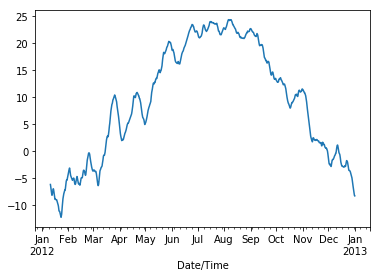

In [97]:
# rolling_mean()
#pd.rolling_mean(weather['Temp (C)'], window=240).plot()  #deprecated
weather['Temp (C)'].rolling(window=240,center=False).mean().plot()

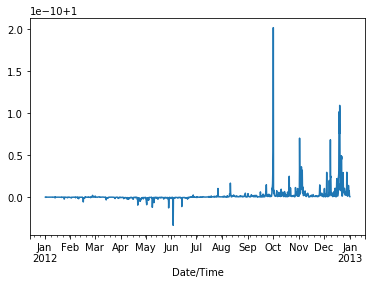

In [98]:
# rolling_corr()
#pd.rolling_corr(weather['Temp (F)'], window=24).plot()  #deprecated
weather['Temp (F)'].rolling(window=24).corr(pairwise=True,other=weather['Temp (F)']).plot()

### One last note, time zone conversions

In [101]:
rng_pytz = pd.date_range('6/6/2017 00:00', periods=10, freq='D', tz='Europe/London')

In [102]:
rng_pytz

DatetimeIndex(['2017-06-06 00:00:00+01:00', '2017-06-07 00:00:00+01:00',
               '2017-06-08 00:00:00+01:00', '2017-06-09 00:00:00+01:00',
               '2017-06-10 00:00:00+01:00', '2017-06-11 00:00:00+01:00',
               '2017-06-12 00:00:00+01:00', '2017-06-13 00:00:00+01:00',
               '2017-06-14 00:00:00+01:00', '2017-06-15 00:00:00+01:00'],
              dtype='datetime64[ns, Europe/London]', freq='D')

In [103]:
rng_utc = pd.date_range('6/6/2017 00:00', periods=10, freq='D',tz='UTC')

In [104]:
rng_utc

DatetimeIndex(['2017-06-06', '2017-06-07', '2017-06-08', '2017-06-09',
               '2017-06-10', '2017-06-11', '2017-06-12', '2017-06-13',
               '2017-06-14', '2017-06-15'],
              dtype='datetime64[ns, UTC]', freq='D')

In [105]:
ts_utc = pd.Series(data = np.random.randn(len(rng_utc)), index = rng_utc)

In [106]:
ts_utc

2017-06-06 00:00:00+00:00   -0.660788
2017-06-07 00:00:00+00:00   -0.506286
2017-06-08 00:00:00+00:00   -0.989258
2017-06-09 00:00:00+00:00    2.722083
2017-06-10 00:00:00+00:00    0.465665
2017-06-11 00:00:00+00:00   -0.739452
2017-06-12 00:00:00+00:00    1.950564
2017-06-13 00:00:00+00:00    0.603063
2017-06-14 00:00:00+00:00   -0.508873
2017-06-15 00:00:00+00:00   -0.079494
Freq: D, dtype: float64

In [107]:
ts_utc.tz_convert('US/Eastern')

2017-06-05 20:00:00-04:00   -0.660788
2017-06-06 20:00:00-04:00   -0.506286
2017-06-07 20:00:00-04:00   -0.989258
2017-06-08 20:00:00-04:00    2.722083
2017-06-09 20:00:00-04:00    0.465665
2017-06-10 20:00:00-04:00   -0.739452
2017-06-11 20:00:00-04:00    1.950564
2017-06-12 20:00:00-04:00    0.603063
2017-06-13 20:00:00-04:00   -0.508873
2017-06-14 20:00:00-04:00   -0.079494
Freq: D, dtype: float64

### You can read more about handling time zones [here](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-zone-handling)